![Static Badge](https://img.shields.io/badge/GitHub-janduplessis883-%23aabd3b)  ![Static Badge](https://img.shields.io/badge/Python-3.10.6-%23ae4f4d) ![Static Badge](https://img.shields.io/badge/Telegram-%40jdp146-%2354a7e5?logo=telegram)

In [1]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats='retina'

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the ch

In [2]:
data = load_google_sheet()

2024-03-31 18:54:37.826 | INFO     | friendsfamilytest.utils:wrapper:19 - 🖥️    Started: 'load_google_sheet'
2024-03-31 18:54:39.898 | INFO     | friendsfamilytest.utils:wrapper:25 - ✅ Completed: 'load_google_sheet' ⚡️2.071577 sec


In [3]:
data.head()

,time,rating,free_text,do_better,surgery
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,Earls Court Surgery
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,Earls Court Surgery
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,Earls Court Surgery
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery


In [8]:
data['free_text_len'] = data['free_text'].str.split().apply(len)
data['do_better_len'] = data['do_better'].str.split().apply(len)

In [9]:
data.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,Earls Court Surgery,13,3
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,Earls Court Surgery,4,0
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery,8,5
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,Earls Court Surgery,5,5
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery,44,6


<Axes: xlabel='free_text_len', ylabel='Count'>

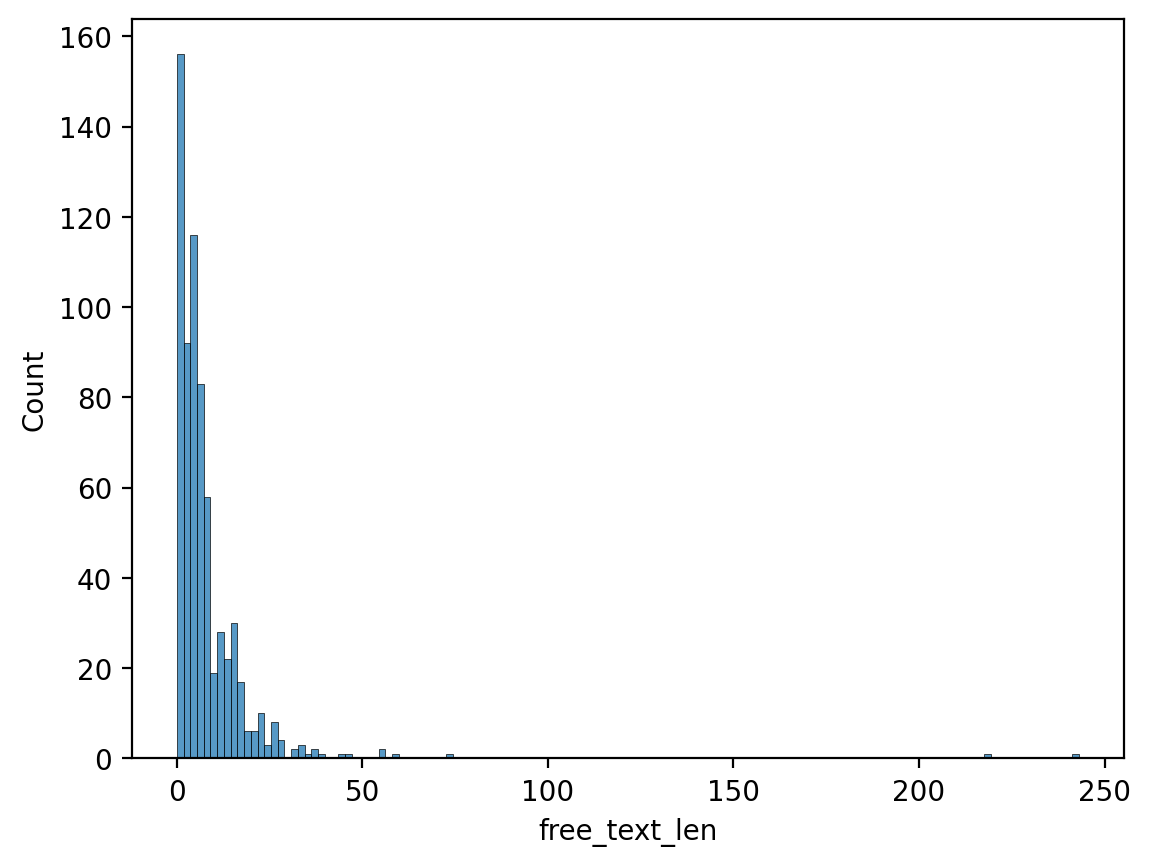

In [10]:
import seaborn as sns
sns.histplot(data=data, x='free_text_len')

<Axes: xlabel='do_better_len', ylabel='Count'>

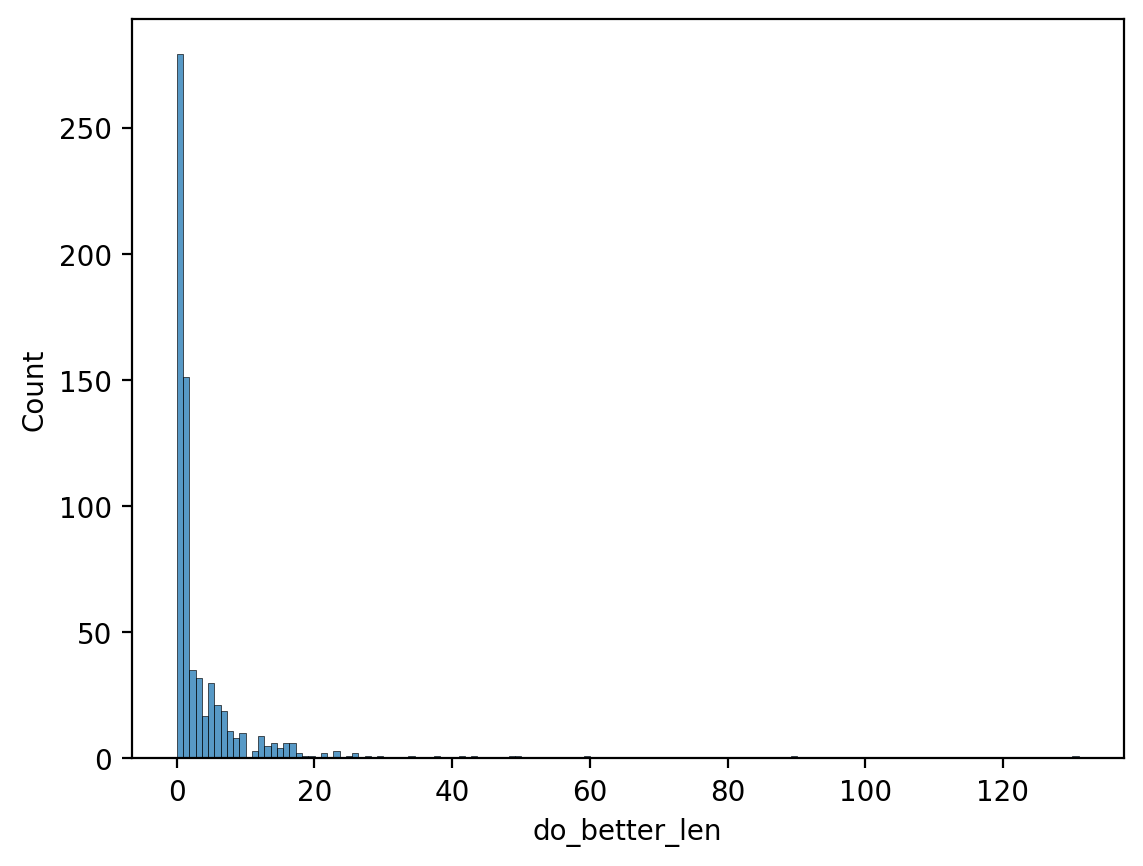

In [11]:
sns.histplot(data=data, x='do_better_len')

In [12]:
remove_list = []
for text in data['do_better']:
    if text == '':
        pass
    elif len(text) < 12 and len(text) > 1:
        remove_list.append(text)
        
print(remove_list)

['Keep it up', 'No', 'No', 'No', 'No answer ', 'wait time', 'No', 'Yes ', 'No', 'No. Fine ', 'No', 'No', 'No', 'Not really\n', 'No', 'None', 'No nothinh', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'None', 'No', 'Not really ', 'NO', 'Nothings ', 'No', 'No', 'Nothing ', 'No', 'No', 'No', 'All good', 'Reminder', 'No', 'N/A', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No ', 'No really ', 'No. ', 'No', 'All good', 'None', 'No', 'No', 'No :)', 'Nothing', 'Not at all', 'No', 'Excellent ', 'No', 'No', 'No', 'No', 'Thanks ', 'No', 'No', 'Not really ', 'No', 'NO.', 'None ', 'No', 'No', 'No ', 'None', 'Thank you 😊', 'Thank you 😊', 'Nope ', 'Nothing', 'No', 'No', 'No', 'None ', 'No', 'No', 'No', 'No', ' No', 'No', 'No', 'No', 'Nothing. ', 'No', 'Nothing ', 'no', 'No', 'No ', 'No', 'None ', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Nothing ', 'That’s all ', 'No', 'No nothing ', 'No tks', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No.', 'No', 'No', 'Nothing', 'No', 'Nathing', 'No', 'non

In [13]:
data.isna().sum()

time             0
rating           0
free_text        0
do_better        0
surgery          0
free_text_len    0
do_better_len    0
dtype: int64

In [14]:
patient_feedback_categories = [
    "Appointment Availability",
    "Reception and Administration",
    "Consultation Quality",
    "Treatment Efficacy",
    "Facility Cleanliness and Comfort",
    "Communication and Information",
    "Wait Times",
    "Confidentiality and Privacy",
    "Telehealth Services",
    "Follow-up Care",
    "Billing and Insurance Handling",
    "COVID-19 Measures",
    "Patient Empowerment",
    "Accessibility",
    "Overall Satisfaction",
    "No Improvement Suggestion",
]


In [15]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli") 

In [16]:
text_list = []
label_list = []
count = 0
for text in data['do_better']:
    count = count + 1
    if text != '':
        output = classifier(text, patient_feedback_categories)
        text_list.append(text)
        label_list.append(output['labels'][0])
        print(count)
        count = count + 1
    else:
        print("Empty input string")
        count = count +1



1
Empty input string
5
7
9
Empty input string
13
15
Empty input string
Empty input string
21
23
Empty input string
Empty input string
29
31
33
35
37
Empty input string
41
43
Empty input string
Empty input string
49
Empty input string
Empty input string
55
Empty input string
59
Empty input string
63
65
Empty input string
Empty input string
Empty input string
Empty input string
75
77
Empty input string
Empty input string
Empty input string
85
87
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
101
Empty input string
105
Empty input string
Empty input string
111
Empty input string
115
117
119
121
123
125
Empty input string
129
Empty input string
133
135
Empty input string
Empty input string
Empty input string
Empty input string
Empty input string
147
149
151
153
Empty input string
157
159
161
163
Empty input string
Empty input string
169
171
173
175
177
179
181
183
Empty input string
187
Empty input string
191
193
195
197
19

In [17]:
text_list

['Keep it up',
 'No. It was the best.',
 'the receptionist was very unkind ',
 'No. I was happy with everything.  ',
 'No. It is already perfect.',
 'No',
 'I think it is getting better, the ladies at the reception can be so rude, it would not do any harm to smile, be friendly, put the patient at ease',
 'The basement is a bit dark and gloomy and reception area could also do with an upgrade ',
 "Earl's court surgery is really lucky to have Nurse A",
 'No',
 'No',
 'Yes, of course, she showed me the easy and a great way to apply for my medicine',
 'No answer ',
 'Everything was done professionally. ',
 'The staff and especially the GP are very good in service. ',
 'wait time',
 'No',
 'Everything  fine  ',
 'Can’t think of anything ',
 "Yes they didn't have my xray for my arm  a waste off time for me there! ",
 'Sendn me to Specialist,the best.',
 'More knowledge newly qualified doctors , enthusiastic ',
 'Nothing I can think about ',
 'Yes ',
 'More doctors in the surgery. ',
 'Everyth

In [18]:
my_dict = {
    "text": text_list,
    "labels": label_list
}

label_df = pd.DataFrame(my_dict)
label_df

,text,labels
0,Keep it up,Follow-up Care
1,No. It was the best.,No Improvement Suggestion
2,the receptionist was very unkind,Reception and Administration
3,No. I was happy with everything.,Overall Satisfaction
4,No. It is already perfect.,No Improvement Suggestion
...,...,...
391,For me all good,Overall Satisfaction
392,No,No Improvement Suggestion
393,No,No Improvement Suggestion
394,Absolutely not.,No Improvement Suggestion


<Axes: xlabel='count', ylabel='labels'>

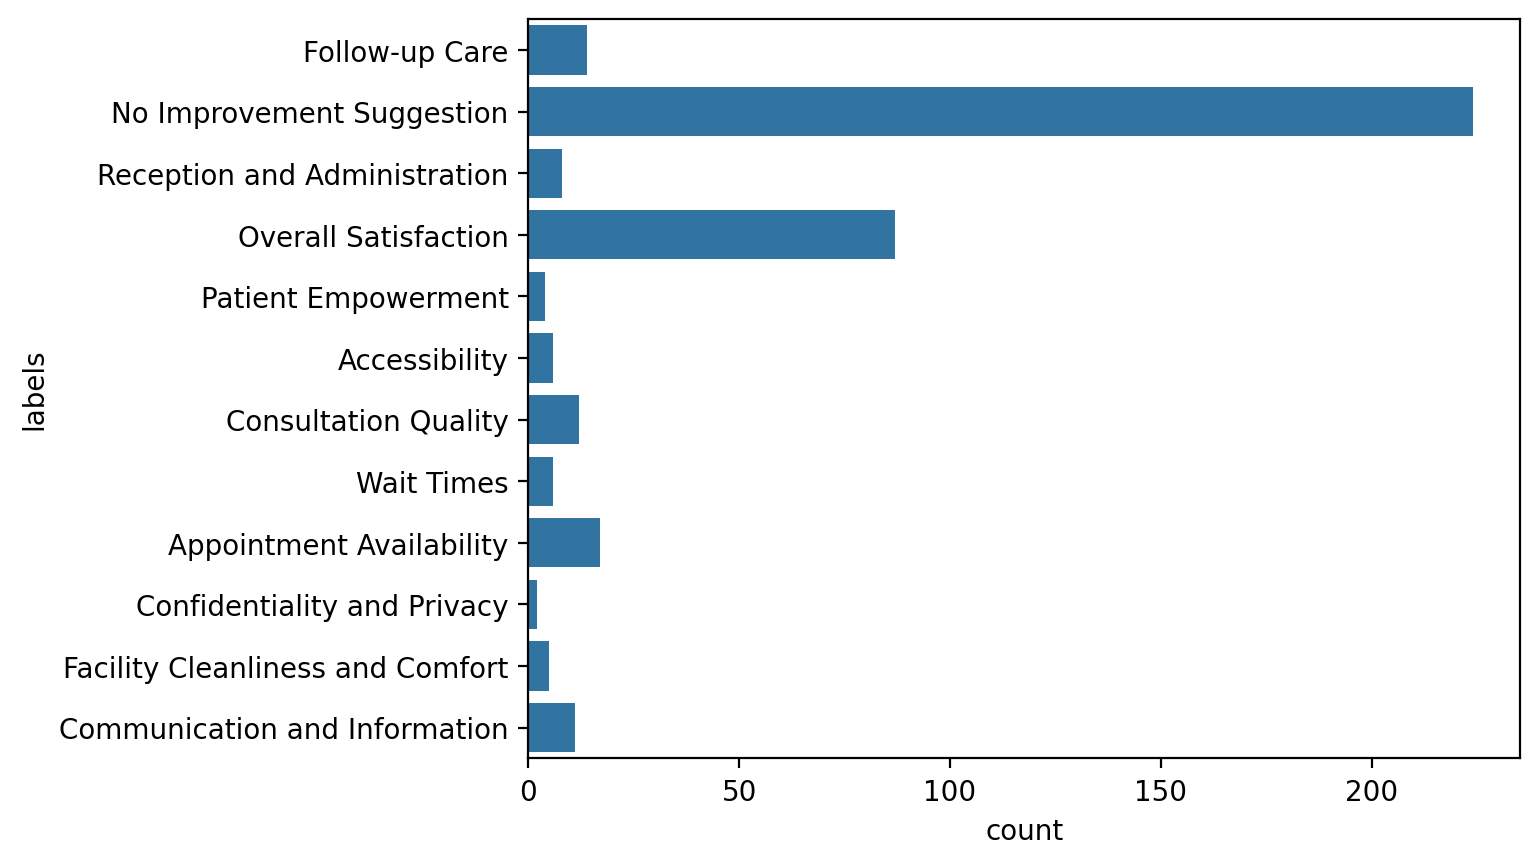

In [19]:
sns.countplot(label_df['labels'])

In [41]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [42]:
data.head(2)

,time,rating,free_text,do_better,surgery,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels
0,2023-07-13 15:28:00,Extremely likely,Very friendly caring staff treated me with res...,NaN,Earls Court Surgery,positive,0.892932,neutral,0.0,13.0,3,5.0,Staff Empathy and Compassion,NaN
1,2023-07-13 15:29:00,Extremely likely,NaN,NaN,Earls Court Surgery,neutral,0.000000,neutral,0.0,4.0,0,5.0,NaN,NaN


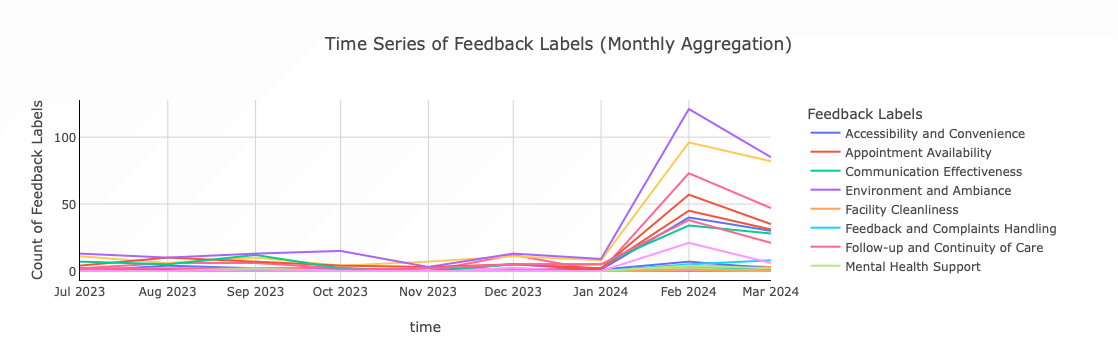

In [43]:
import pandas as pd
import plotly.express as px
data = data[((data['sentiment_free_text'] == 'neutral') | (data['sentiment_free_text'] == 'positive'))]
data["time"] = pd.to_datetime(data["time"])

# Setting the 'time' column as the index
data.set_index("time", inplace=True)

# Grouping by month and 'feedback_labels' and then counting the occurrences
# Converting the time index to a period index for monthly resampling
data.index = data.index.to_period("M")
monthly_feedback_counts = (
    data.groupby([data.index, "feedback_labels"])
    .size()
    .unstack(fill_value=0)
)

# Converting the period index back to a timestamp for compatibility with Plotly
monthly_feedback_counts.index = monthly_feedback_counts.index.to_timestamp()

# Plotting the data using Plotly Express with custom line colors
fig1 = px.line(
    monthly_feedback_counts,
    x=monthly_feedback_counts.index,
    y=monthly_feedback_counts.columns,
    title="Time Series of Feedback Labels (Monthly Aggregation)",
    labels={"x": "Month", "value": "Count of Feedback Labels", "variable": "Feedback Labels"},
    color_discrete_sequence=px.colors.qualitative.Plotly,
)

# Updating the layout
fig1.update_layout(
    width=1100,
    legend=dict(title="Feedback Labels", x=1.05, y=1, xanchor="left", yanchor="top"),
    xaxis=dict(gridcolor="lightgray", showline=True, linewidth=1, linecolor="black"),
    yaxis=dict(gridcolor="lightgray", showline=True, linewidth=1, linecolor="black"),
    plot_bgcolor="white",
)

# Displaying the plot in Jupyter Notebook
fig1.show()